In [1]:
#importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)

# Data Understanding

In [70]:
df=pd.read_csv('/Users/edwardkohn/Desktop/CarPrice_Assignment.csv')
df.head(3)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


In [72]:
# car id drops as is no relevant for our model
df.drop('car_ID',1,inplace=True)

In [73]:
#check columns info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg      

In [74]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17
compressionratio,205.0,10.142537,3.972040,7.00,8.60,9.00,9.40,23.00


In [75]:
# see correlation between variables
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm')

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.10579,-0.130051,-0.00873514,-0.178515,0.0708727,0.273606,-0.0358226,0.034606,-0.0799782
wheelbase,-0.531954,1,0.874587,0.795144,0.589435,0.776386,0.569329,0.48875,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1,0.841118,0.491029,0.877728,0.68336,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.68292
carwidth,-0.232919,0.795144,0.841118,1,0.27921,0.867032,0.735433,0.55915,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.27921,1,0.295572,0.0671487,0.171071,-0.0553067,0.261214,-0.108802,-0.320411,-0.0486396,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1,0.850594,0.64848,0.16879,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.10579,0.569329,0.68336,0.735433,0.0671487,0.850594,1,0.583774,0.203129,0.0289714,0.809769,-0.24466,-0.653658,-0.67747,0.874145
boreratio,-0.130051,0.48875,0.606454,0.55915,0.171071,0.64848,0.583774,1,-0.055909,0.00519734,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.00873514,0.160959,0.129533,0.182942,-0.0553067,0.16879,0.203129,-0.055909,1,0.18611,0.0809395,-0.0679638,-0.0421448,-0.0439309,0.0794431
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.0289714,0.00519734,0.18611,1,-0.204326,-0.435741,0.324701,0.265201,0.0679835


# Data conversion/feature engineering

In [76]:
df['symboling'] = df['symboling'].astype(str)

In [77]:
# expand makes the split convert into DF
df['Make'] = df['CarName'].str.split(' ',expand=True)[0]

In [78]:
df['Make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [79]:
#Fixing typos in data
df['Make'] = df['Make'].replace({'maxda':'mazda','toyouta':'toyota','porcshce':'porsche','vokswagen':'volkswagen','vw':'volkswagen','alfa-romero':'alfa-romeo'})

In [80]:
# drop old car column
df.drop('CarName',1,inplace=True)

In [81]:
# separating between cat and numeric
col_numeric = list(df.select_dtypes(exclude='object'))
col_categorical = list(df.select_dtypes(include='object'))

In [82]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Make
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romeo
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romeo
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romeo
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


# Exploratory and Data Analysis

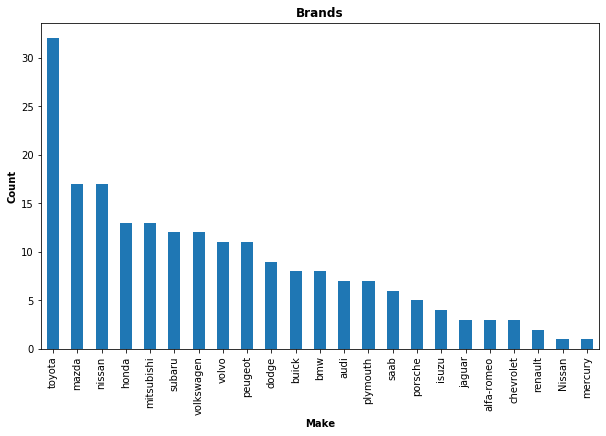

In [83]:
#count of cars per make
fig,ax = plt.subplots(figsize=(10,6))
df['Make'].value_counts().plot(kind='bar')
ax.set_title('Brands',fontweight='bold')
ax.set_xlabel('Make',fontweight='bold')
ax.set_ylabel('Count',fontweight='bold')
plt.show()

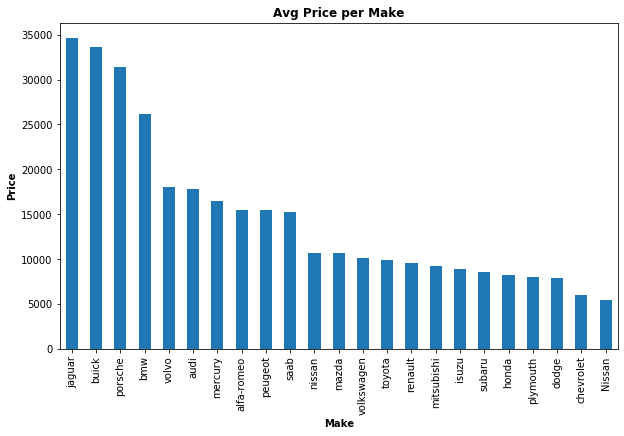

In [84]:
#average price per car
fig,ax = plt.subplots(figsize=(10,6))
avg_per_make = df.groupby('Make')['price'].mean().round(2)
avg_per_make.sort_values(ascending=False).plot(kind='bar')
ax.set_title('Avg Price per Make',fontweight='bold')
ax.set_xlabel('Make',fontweight='bold')
ax.set_ylabel('Price',fontweight='bold');

# View of cat variables

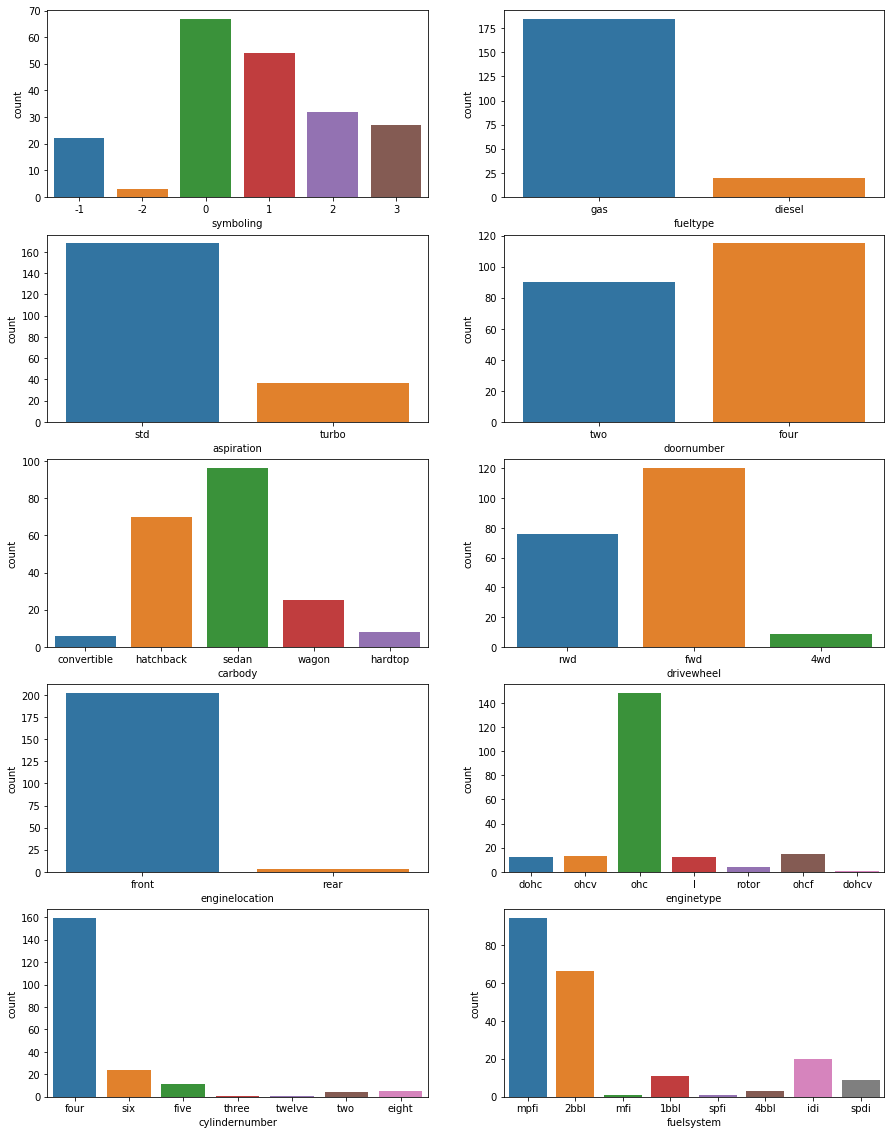

In [85]:
plt.figure(figsize=(15,20))
for i,col in enumerate(col_categorical[:-1],1):
    plt.subplot(5,2,i)
    sns.countplot(df[col])
    plt.xlabel(col)

# Analyzing Dependent variable

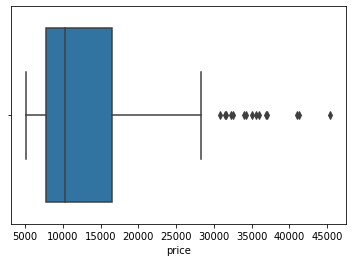

In [86]:
sns.boxplot(df['price'])

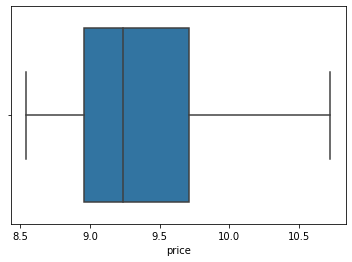

In [87]:
# log eliminates the outliers due to the distribution of the variable
sns.boxplot(np.log(df['price']))

In [88]:
# log eliminates the outliers
df['price'] = np.log(df['price'])

# creating avg column between those independent variables showing high correlation to avoid multicollinearity (car dimmensions,engine variables,mpg)

In [89]:
df['car_dimenssions_avg'] = (df['wheelbase'] + df['carlength'] + df['carwidth'] + df['carheight'] + df['curbweight'])/5

In [90]:
df['engine_variables_avg'] = df[[col for col in df.columns if 'horsepower'and'enginesize' in col]].mean(axis=1)

In [91]:
df.drop(labels=['wheelbase','carlength','carwidth','carheight','curbweight'],axis=1,inplace=True)

In [92]:
df.drop(labels=['horsepower','enginesize'],axis=1,inplace=True)

In [93]:
df['mpg_avg'] = df[[col for col in df.columns if 'citympg'and'highwaympg' in col]].mean(axis=1)

In [94]:
df.drop(labels=['highwaympg','citympg'],axis=1,inplace=True)

# Converting categorical variables to numeric

In [106]:
dummies_conv=pd.get_dummies(df.select_dtypes(include='object'),drop_first=True)

In [110]:
all_variables_df = pd.concat([df,dummies_conv],axis=1)

In [112]:
final_df = all_variables_df.drop(df.select_dtypes('object'),axis=1)

# Importing libraries to start ML process

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.tools.eval_measures import rmse

In [115]:
#defining variables
X = final_df.drop('price',1)
y = final_df['price']

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [117]:
model = LinearRegression()

In [118]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [120]:
predictions=model.predict(X_test)

In [125]:
actual_vs_predictions_df=pd.DataFrame({'Actual':y_test,'Pred':predictions})

In [126]:
actual_vs_predictions_df.head()

,Actual,Pred
15,10.333970,10.434699
9,9.790272,10.084649
100,9.164192,9.089066
132,9.380083,9.604740
68,10.248778,10.256904


# Evaluating meassures

In [128]:
# evaluating model
rmse(y_test,predictions)

0.1510466605211055

In [130]:
actual_vs_predictions_df['Actual'].mean()

9.322741746454518

In [129]:
# R2 explained
r2_score(y_test,predictions)

0.9114921166738623